# Storm Depth Histograms

## Setup the basic working environment

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas
import seaborn

import pycvc

warnings.simplefilter("ignore")

palette = seaborn.color_palette('deep', n_colors=6)
seaborn.set(style='ticks', context='paper', rc={'text.usetex': False})
%matplotlib inline

## Create CVC *`Database`* and *`Site`* objects

In [2]:
cvcdbfile = "C:/users/phobson/Desktop/cvc.accdb"
cvcdb = pycvc.Database(cvcdbfile, None, None, testing=False)

LV1 = pycvc.Site(db=cvcdb, siteid='LV-1', raingauge='LV-1', tocentry='Lakeview Control', 
                 isreference=True, minprecip=1.999, color=palette[1], marker='s')

### Function to classify storms by depth

In [3]:
def storm_classifier(storm_depth):
    if storm_depth < 5:
        label = "<5 mm"
    elif storm_depth < 10:
        label = "5 - 10 mm"
    elif storm_depth < 15:
        label = "10 - 15 mm"
    elif storm_depth < 20:
        label = "15 - 20 mm"
    elif storm_depth < 25:
        label = "20 - 25 mm"
    elif storm_depth >= 25:
        label = ">25 mm"
    else:
        label = None
        
    return label

### Function to draw a histogram of storm depths

    
#### Parameters
`site` : **pycvc.Site** object
> A object representing a CVC monitoring site.

`rowcol, huecol` : string, optional
> Column names that will be used to facet the data
> into different rows and hues, respectively.
> Valid values are the following:
>   - "year"
>   - "season"
>   - "grouped_season"
>   - "has_outflow"

`filename` : string, optional
> The path and name of a file to which the plots will
> be saved.

#### Returns
`df` : **pandas.DataFrame**
> Dataframe with all of the relevant hydrologic information.

`fig` : **seaborn.FacetGrid**
> The figure containing the axes and artists that represent
> the histogram.

#### Examples
```python
import pycvc
cvcdbfile = "C:/users/phobson/Desktop/cvc.accdb"
cvcdb = pycvc.Database(cvcdbfile, None, None, testing=False)
LV1 = pycvc.Site(db=cvcdb, siteid='LV-1', raingauge='LV-1', tocentry='Lakeview Control', 
                 isreference=True, minprecip=1.999, color=palette[1], marker='s')
df, fig = storm_hist(LV1.storm_info, huecol='has_outflow', filename='MyHistogram.png') 
```


In [4]:
def storm_hist(site, rowcol=None, huecol=None, filename=None):

    cats = ["<5 mm", "5 - 10 mm", "10 - 15 mm", "15 - 20 mm", "20 - 25 mm", ">25 mm"]
    prelim_cols = ['year', 'season', 'grouped_season', 'total_precip_depth', 'has_outflow']
    df = site.storm_info.copy()[prelim_cols]
    df['Storm Size'] = (
        df['total_precip_depth']
            .apply(storm_classifier)
            .astype("category", categories=cats, ordered=True)
    )
    
    fig = seaborn.factorplot(
        data=df, 
        x='Storm Size', 
        hue=huecol,
        row=rowcol,
        kind='count', 
        aspect=1.6,
    ).set_ylabels("Occurences")
    
    if filename is not None:
        fig.savefig(filename, dpi=300)
    
    return df, fig

## Example Figures

### Histogram divied up by the presence of outflow

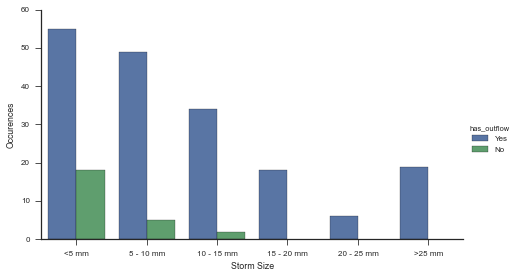

In [5]:
df, fig = storm_hist(LV1, huecol='has_outflow') 
fig    

### Put the grouped seasons in rows, ignore outflow

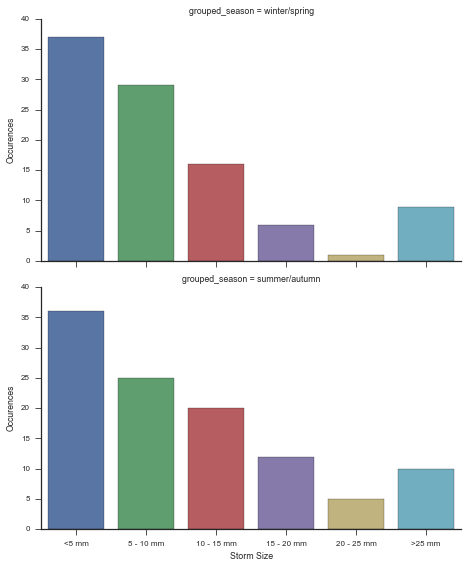

In [6]:
df, fig = storm_hist(LV1, rowcol='grouped_season') 
fig   

### Color by years, rows by outflow

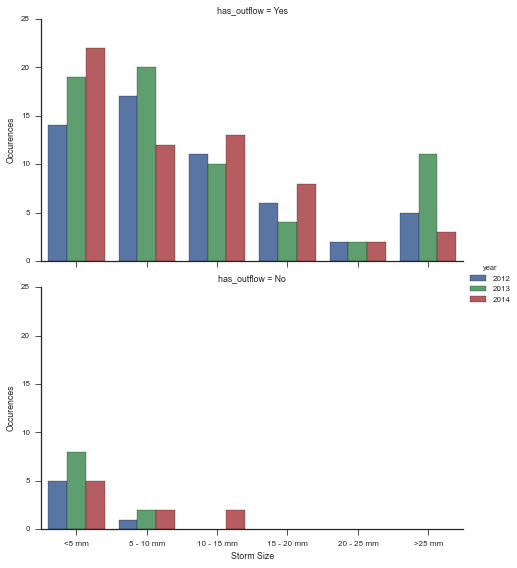

In [7]:
df, fig = storm_hist(LV1, huecol='year', rowcol='has_outflow') 
fig   